In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Перш за все прочитаэмо датасет
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data()

# Нормалізуємо
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Розділимо тестові дані на тест та валідацію
test_X, valid_X, test_Y, valid_Y = train_test_split(test_X, test_Y, test_size=0.5, shuffle=True, stratify=test_Y)

# Приведемо категорії у вигляд, необхідний для роботи метрики
train_Y = tf.one_hot(train_Y, 10)
test_Y = tf.one_hot(test_Y, 10)
valid_Y = tf.one_hot(valid_Y, 10)

train_X.shape, train_Y.shape, test_X.shape, test_Y.shape, valid_X.shape, valid_Y.shape

((60000, 28, 28),
 TensorShape([60000, 10]),
 (5000, 28, 28),
 TensorShape([5000, 10]),
 (5000, 28, 28),
 TensorShape([5000, 10]))

In [4]:
# Створимо функцію, для швидкого виведення історії втрат та точності
def present_histiry(title, history_data):
    figure, axis = plt.subplots(ncols=2, figsize=(15,10))

    axis[0].plot(history_data.history["loss"], label="train loss")
    axis[0].plot(history_data.history["val_loss"], label="valid loss")
    # axis[0].title(title + ": loss")
    axis[0].grid()
    axis[0].legend()
    #plt.show()

    axis[1].plot(history_data.history["categorical_accuracy"], label="train accuracy")
    axis[1].plot(history_data.history["val_categorical_accuracy"], label="valid accuracy")
    # axis[1].title(title + ": accuracy")
    axis[1].grid()
    axis[1].legend()

    figure.suptitle(title + f" max val accuracy {max(history_data.history['val_categorical_accuracy'])}")
    
    plt.show()


In [5]:
# створимо модель у першому наближенні

model = tf.keras.models.Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
#model.add(MaxPool2D((3, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.RMSprop(), metrics=['categorical_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [6]:
history = model.fit(train_X, train_Y, batch_size=500, epochs=20, verbose=1, validation_data=(valid_X, valid_Y))

Epoch 1/20
120/120 [==============================] - 50s 410ms/step - loss: 0.7924 - categorical_accuracy: 0.7125 - val_loss: 0.5407 - val_categorical_accuracy: 0.8120
Epoch 2/20
120/120 [==============================] - 49s 411ms/step - loss: 0.4251 - categorical_accuracy: 0.8455 - val_loss: 0.4086 - val_categorical_accuracy: 0.8516
Epoch 3/20
120/120 [==============================] - 59s 489ms/step - loss: 0.3517 - categorical_accuracy: 0.8714 - val_loss: 0.3401 - val_categorical_accuracy: 0.8768
Epoch 4/20
120/120 [==============================] - 59s 491ms/step - loss: 0.3116 - categorical_accuracy: 0.8855 - val_loss: 0.3217 - val_categorical_accuracy: 0.8878
Epoch 5/20
120/120 [==============================] - 50s 414ms/step - loss: 0.2846 - categorical_accuracy: 0.8959 - val_loss: 0.3010 - val_categorical_accuracy: 0.8954
Epoch 6/20
120/120 [==============================] - 46s 385ms/step - loss: 0.2619 - categorical_accuracy: 0.9031 - val_loss: 0.3067 - val_categorical_acc

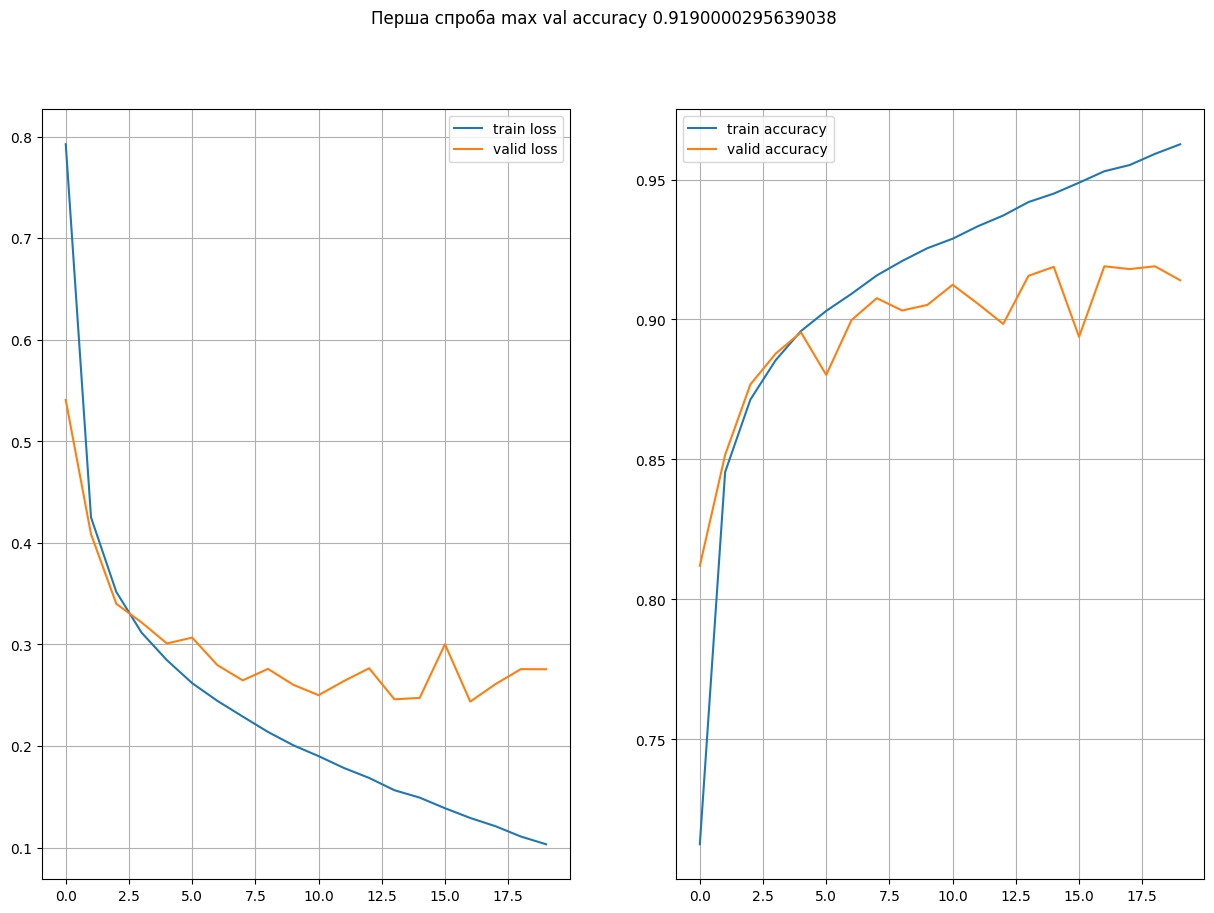

In [7]:
present_histiry("Перша спроба", history)

Як бачимо, модель без проблем долає позначку в 91%. Ну що ж, приступимо до експериментів

In [8]:
# Додамо регуляризацію та трохи переглянемо Dense шари

model = tf.keras.models.Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(tf.keras.layers.GaussianNoise(.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="categorical_crossentropy", metrics=["accuracy", "categorical_crossentropy", "categorical_accuracy"])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [9]:
# Також підключимо колбеки
model_id = 0
callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_crossentropy", mode="min", verbose=0, patience=10)
callback_save = tf.keras.callbacks.ModelCheckpoint(filepath=f"model_{model_id}", save_best_only=True, monitor="val_accuracy", mode="max", verbose=0)

history = model.fit(train_X, train_Y, batch_size=1000, epochs=200, verbose=0, validation_data=(valid_X, valid_Y), callbacks=[callback_save, callback_early_stopping])

INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


INFO:tensorflow:Assets written to: model_0\assets


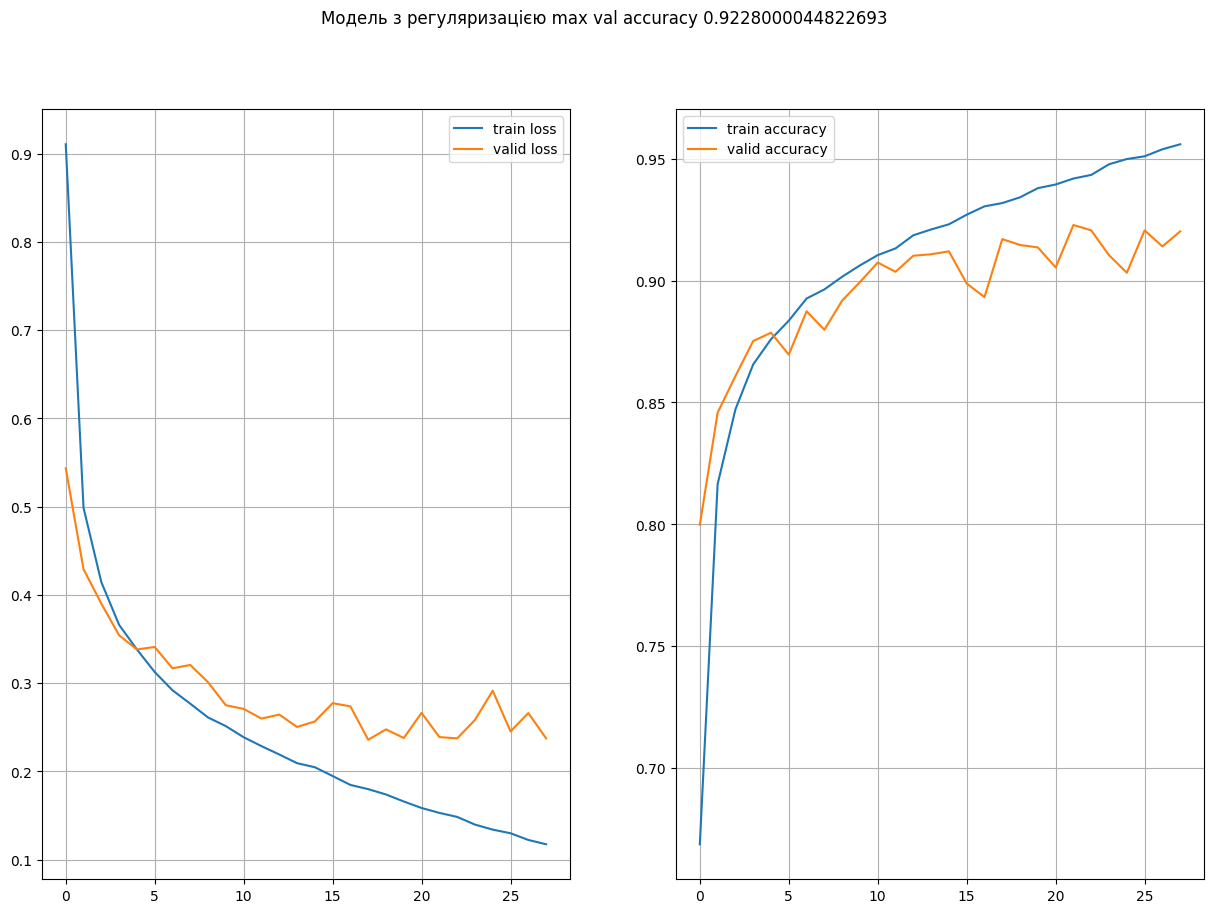

In [10]:
present_histiry("Модель з регуляризацією", history)

Результат покращився, але без вау ефекта.

Перейдемо до експериментів.

Шари Conv2D та MaxPooling2D вивчають локальні властивості вхідних даних після чого передають результати для аналізу в шари Dense. І навчаються та працюють вони відносно повільно.

Скористаємось помилкою, яку піймали у минулому ДЗ і спробуємо її використати при виконанні поточного.

З того ж таки попереднього ДЗ ми знаємо, що один невеликий Dense шар може видавата досить адекватну, хоч і не ідеальну, оцінку.

Отже:
1. Створюємо 3 масиви шарів Conv2D та MaxPooling2D
2. На підставі цих масивів навчаємо нейромережі з простими шарами Dense та регуляризацією, і сподіваємось на адекватний результат
3. Заморожуємо згорткові шари, додаємо їх у нові моделі, де вже бавимося з Dense шарами та іншими гіперпараметрами моделей

In [11]:
# Набір з першої моделі
l_0 = [
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"),
    MaxPool2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D((2, 2))
]

# Набір з конспекта
l_1 = [
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
]

# Перші шари з VGG16
l_2 =[
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D((2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D((2, 2))
]

conv_layers_list = [l_0, l_1, l_2]

In [12]:
models_list = []

for i in range(3):
    pre_model = tf.keras.models.Sequential()
    
    for layer in conv_layers_list[i]:
        pre_model.add(layer)

    pre_model.add(Flatten())
    pre_model.add(Dense(256, activation='relu'))
    pre_model.add(tf.keras.layers.GaussianNoise(.2))
    pre_model.add(Dense(10, activation='softmax'))

    pre_model.compile(optimizer=tf.keras.optimizers.AdamW(), loss="categorical_crossentropy", metrics=["accuracy", "categorical_crossentropy", "categorical_accuracy"])

    print(f"model {i}")
    pre_model.summary()

    models_list.append(pre_model)


model 0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 256)      

INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


INFO:tensorflow:Assets written to: model_10\assets


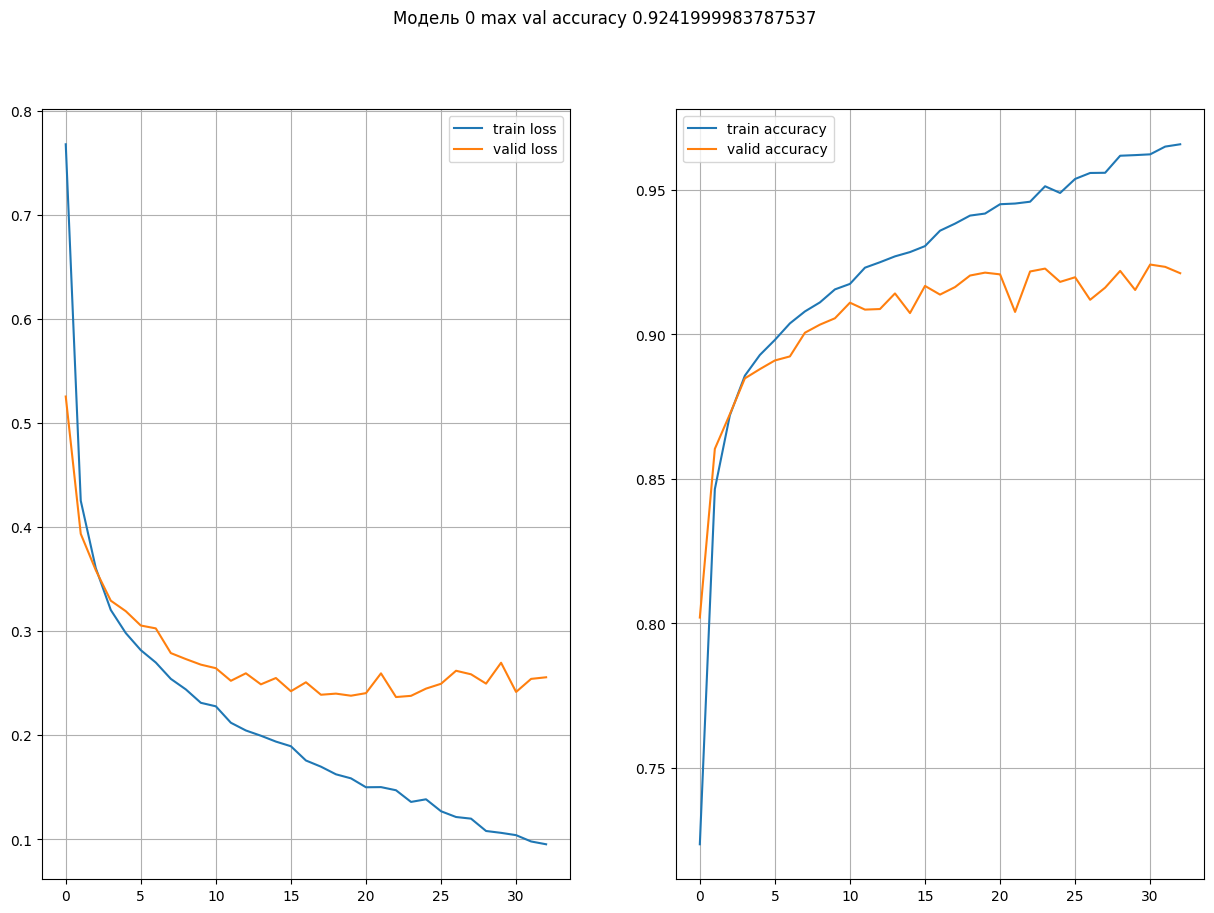

INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


INFO:tensorflow:Assets written to: model_11\assets


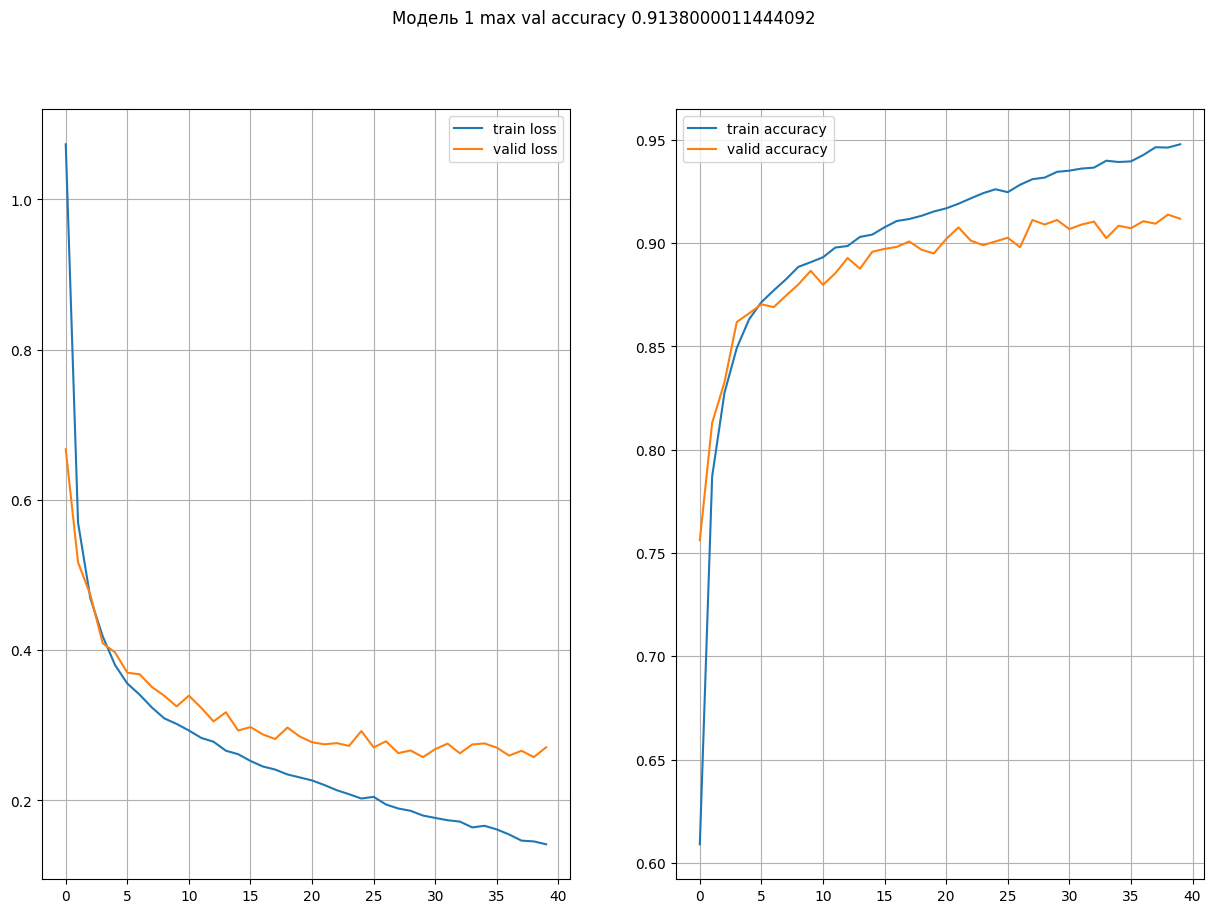

INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


INFO:tensorflow:Assets written to: model_12\assets


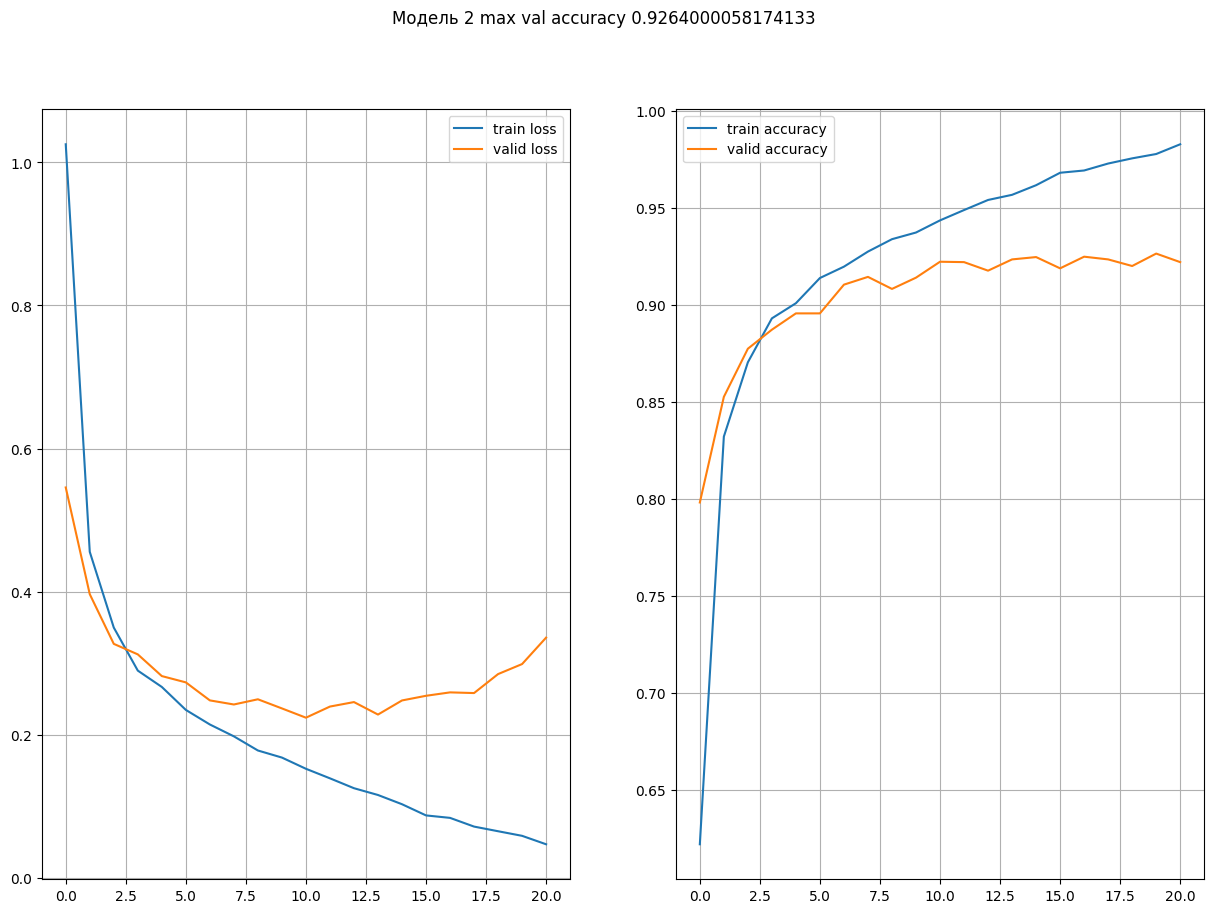

In [13]:
model_id = 10
for i in range(3):
    callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_crossentropy", mode="min", verbose=0, patience=10)
    callback_save = tf.keras.callbacks.ModelCheckpoint(filepath=f"model_{model_id}", save_best_only=True, monitor="val_accuracy", mode="max", verbose=0)
    
    history = models_list[i].fit(train_X, train_Y, batch_size=1000, epochs=200, verbose=0, validation_data=(valid_X, valid_Y), callbacks=[callback_save, callback_early_stopping])
    
    present_histiry(f"Модель {i}", history)
    
    model_id += 1

Ну що ж, у нас вельми явний фаворит.

Якщо в минулому ДЗ подальше ускладнення нейромережі не давало помітного приросту точності, то зараз, схоже, оптимальної складності ще не досягнуто і ускладнення згорткових шарів може дати приріст.

Отже зупинимось на останньому наборі згорткових шарів. 

Стосовно способу, в який ми далі навчатимемо модель.

Ми можемо брати шари з масиву, скидати ознаку можливості навчання, перекидати їх в нову модель, яку в подальшому і навчати.

А можемо взяти шари з масиву, створити з них модель, через цю модель прогнати навчальні та валідаційні дані (тільки ікси) і створити новий сет для навчання. Виглядатиме як препроцесинг даних. У випадку, коли часу мало, а пам'яті достатньо ми суттєво прискоримо навчання моделі.

Тож перевіримо теорію. На базі існуючої моделі створимо дві та спробуємо передбачити результат

In [15]:
model_2 = tf.keras.saving.load_model("model_12")
#if False:
#    model_2 = tf.keras.models.Sequential() 
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [16]:
model_2.evaluate(test_X, test_Y)

157/157 [==============================] - 11s 65ms/step - loss: 0.2562 - accuracy: 0.9296 - categorical_crossentropy: 0.2562 - categorical_accuracy: 0.9296


[0.25620266795158386,
 0.9296000003814697,
 0.25620266795158386,
 0.9296000003814697]

In [26]:
model_3 = tf.keras.models.Sequential(model_2.layers[:-3])
for layer in model_3.layers:
    layer.trainable = False
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [27]:
model_3.add(Dense(1024, activation='relu'))
model_3.add(tf.keras.layers.GaussianNoise(.2))
model_3.add(Dense(10, activation='softmax'))

model_3.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 256)         295168    
          

Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8861 - categorical_crossentropy: 0.4745 - categorical_accuracy: 0.8861INFO:tensorflow:Assets written to: model_20\assets


INFO:tensorflow:Assets written to: model_20\assets


60/60 [==============================] - 162s 3s/step - loss: 0.4745 - accuracy: 0.8861 - categorical_crossentropy: 0.4745 - categorical_accuracy: 0.8861 - val_loss: 0.3152 - val_accuracy: 0.8918 - val_categorical_crossentropy: 0.3152 - val_categorical_accuracy: 0.8918
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 0.9428 - categorical_crossentropy: 0.1611 - categorical_accuracy: 0.9428INFO:tensorflow:Assets written to: model_20\assets


INFO:tensorflow:Assets written to: model_20\assets


60/60 [==============================] - 165s 3s/step - loss: 0.1611 - accuracy: 0.9428 - categorical_crossentropy: 0.1611 - categorical_accuracy: 0.9428 - val_loss: 0.2585 - val_accuracy: 0.9186 - val_categorical_crossentropy: 0.2585 - val_categorical_accuracy: 0.9186
Epoch 3/200
60/60 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9592 - categorical_crossentropy: 0.1140 - categorical_accuracy: 0.9592INFO:tensorflow:Assets written to: model_20\assets


INFO:tensorflow:Assets written to: model_20\assets


60/60 [==============================] - 162s 3s/step - loss: 0.1140 - accuracy: 0.9592 - categorical_crossentropy: 0.1140 - categorical_accuracy: 0.9592 - val_loss: 0.2501 - val_accuracy: 0.9280 - val_categorical_crossentropy: 0.2501 - val_categorical_accuracy: 0.9280
Epoch 4/200
60/60 [==============================] - 138s 2s/step - loss: 0.0901 - accuracy: 0.9669 - categorical_crossentropy: 0.0901 - categorical_accuracy: 0.9669 - val_loss: 0.3362 - val_accuracy: 0.9032 - val_categorical_crossentropy: 0.3362 - val_categorical_accuracy: 0.9032
Epoch 5/200
60/60 [==============================] - 162s 3s/step - loss: 0.0731 - accuracy: 0.9725 - categorical_crossentropy: 0.0731 - categorical_accuracy: 0.9725 - val_loss: 0.3153 - val_accuracy: 0.9230 - val_categorical_crossentropy: 0.3153 - val_categorical_accuracy: 0.9230
Epoch 6/200
60/60 [==============================] - 173s 3s/step - loss: 0.0630 - accuracy: 0.9765 - categorical_crossentropy: 0.0630 - categorical_accuracy: 0.9765 

INFO:tensorflow:Assets written to: model_20\assets


60/60 [==============================] - 174s 3s/step - loss: 0.0469 - accuracy: 0.9827 - categorical_crossentropy: 0.0469 - categorical_accuracy: 0.9827 - val_loss: 0.3156 - val_accuracy: 0.9314 - val_categorical_crossentropy: 0.3156 - val_categorical_accuracy: 0.9314
Epoch 9/200
60/60 [==============================] - 176s 3s/step - loss: 0.0481 - accuracy: 0.9836 - categorical_crossentropy: 0.0481 - categorical_accuracy: 0.9836 - val_loss: 0.3364 - val_accuracy: 0.9248 - val_categorical_crossentropy: 0.3364 - val_categorical_accuracy: 0.9248
Epoch 10/200
60/60 [==============================] - 173s 3s/step - loss: 0.0313 - accuracy: 0.9889 - categorical_crossentropy: 0.0313 - categorical_accuracy: 0.9889 - val_loss: 0.3785 - val_accuracy: 0.9254 - val_categorical_crossentropy: 0.3785 - val_categorical_accuracy: 0.9254
Epoch 11/200
60/60 [==============================] - 161s 3s/step - loss: 0.0342 - accuracy: 0.9887 - categorical_crossentropy: 0.0342 - categorical_accuracy: 0.988

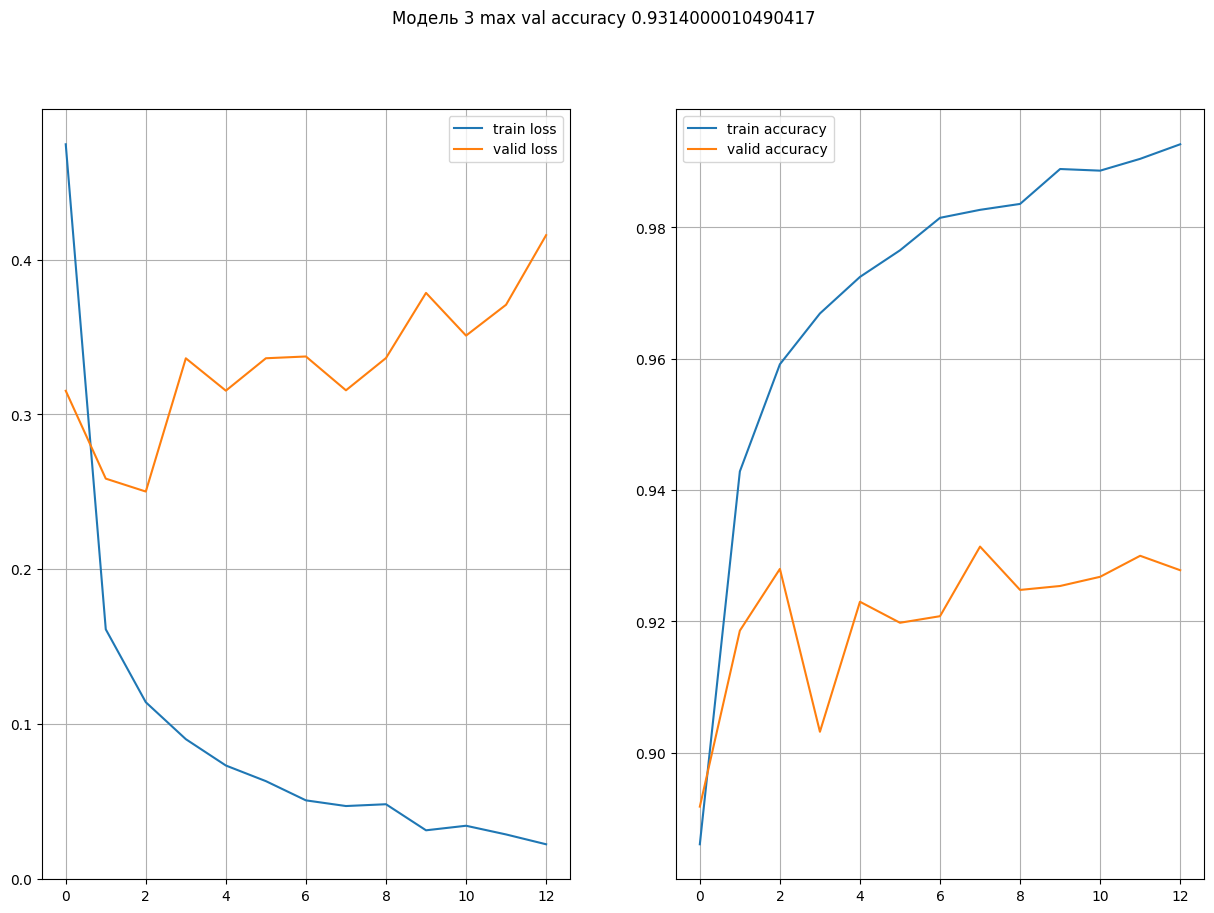

In [28]:
model_id = 20

model_3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="categorical_crossentropy", metrics=["accuracy", "categorical_crossentropy", "categorical_accuracy"])

callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_crossentropy", mode="min", verbose=0, patience=10)
callback_save = tf.keras.callbacks.ModelCheckpoint(filepath=f"model_{model_id}", save_best_only=True, monitor="val_accuracy", mode="max", verbose=0)
    
history = model_3.fit(train_X, train_Y, batch_size=1000, epochs=200, verbose=1, validation_data=(valid_X, valid_Y), callbacks=[callback_save, callback_early_stopping])
    
present_histiry(f"Модель 3", history)


В нашому випадку ускладнення моделі дало результат, хоч він і не виглядає вражаючим.

З огляду на конкретну задачу, на моє переконання, подальше ускладнення моделі в частині конволюційних шарів може дати приріст якості, однак тренування таких моделей вимагає багато часу, тож краще скористаємося вже попередньо натренованою моделлю VGG16, як того вимагає друга частина домашнього завдання